__Titanic Survival analysis - K-Nearest Neighbors__

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

# Loading Dataset

In [2]:
data = pd.read_csv('titanic_train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking Shape of the Dataset

data.shape

(891, 12)

# Missing Values Treatment

In [4]:
# Checking Null Values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- In dataset we have Total 891 Rows and 12 Columns
- Cabin : Out of 891 Rows 687 Rows have missing values i.e. 77% data is missing
- hence cabin column is not relevant

In [5]:
# Dropping Cabin Column

data.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [6]:
data.shape

(891, 11)

## Filling Missing values

In [7]:
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Frequency'>

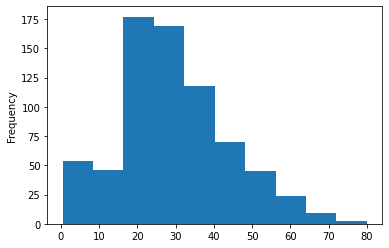

In [9]:
data['Age'].plot.hist()

In [10]:
# Filling missing values from Age column with .mean() as data is having bell shaped curve

data['Age'].fillna(data['Age'].mean(), inplace=True)

In [11]:
# Embarked column is categorical so calculating the mode and filling it

data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- Maximum passengers are from 'S' = Southampton i.e. 644
- Hence, filling missing values from Embarked column with 'S' 


In [12]:
data['Embarked'].fillna(value='S', inplace=True)

In [13]:
# Checking missing values after missing values treatment

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- No Missing values remained in data

## Dropping Irrelevant Columns from dataset

- Name , PassengerId and Ticket Number are irrelevant columns from dataset having no impact Survival of any of the passenger 

In [14]:
data.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Converting categorical (text) data to numerical

## Encoding data using label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

data['Sex'] = lab.fit_transform(data['Sex'])
data['Embarked'] = lab.fit_transform(data['Embarked'])


In [18]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


__________________

# K-Nearest Neighbor

## Importing ML Modules

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [21]:
def prediction(n):
    x = data.drop(['Pclass'],axis=1)
    y = data['Pclass']
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()



Enter The number of iteration you want for k: 200
--------------------------------------------------------------------------------------
Here k value is 1: 

Acuuracy when k is 1  0.8544776119402985
Confusion matrix when k is 1  
 [[ 56   4   0]
 [  9  34   9]
 [  2  15 139]]
--------------------------------------------------------------------------------------
Here k value is 2: 

Acuuracy when k is 2  0.8283582089552238
Confusion matrix when k is 2  
 [[ 57   3   0]
 [ 11  37   4]
 [  5  23 128]]
--------------------------------------------------------------------------------------
Here k value is 3: 

Acuuracy when k is 3  0.8470149253731343
Confusion matrix when k is 3  
 [[ 55   3   2]
 [ 10  33   9]
 [  3  14 139]]
--------------------------------------------------------------------------------------
Here k value is 4: 

Acuuracy when k is 4  0.8395522388059702
Confusion matrix when k is 4  
 [[ 57   2   1]
 [ 12  32   8]
 [  4  16 136]]
------------------------------------------


Acuuracy when k is 37  0.7798507462686567
Confusion matrix when k is 37  
 [[ 55   2   3]
 [ 12  16  24]
 [  6  12 138]]
--------------------------------------------------------------------------------------
Here k value is 38: 

Acuuracy when k is 38  0.7686567164179104
Confusion matrix when k is 38  
 [[ 55   2   3]
 [ 12  14  26]
 [  6  13 137]]
--------------------------------------------------------------------------------------
Here k value is 39: 

Acuuracy when k is 39  0.7798507462686567
Confusion matrix when k is 39  
 [[ 55   2   3]
 [ 11  15  26]
 [  6  11 139]]
--------------------------------------------------------------------------------------
Here k value is 40: 

Acuuracy when k is 40  0.7611940298507462
Confusion matrix when k is 40  
 [[ 55   2   3]
 [ 12  13  27]
 [  6  14 136]]
--------------------------------------------------------------------------------------
Here k value is 41: 

Acuuracy when k is 41  0.7686567164179104
Confusion matrix when k is 41  
 [[ 5

Acuuracy when k is 75  0.7313432835820896
Confusion matrix when k is 75  
 [[ 44   9   7]
 [  3  11  38]
 [  7   8 141]]
--------------------------------------------------------------------------------------
Here k value is 76: 

Acuuracy when k is 76  0.7425373134328358
Confusion matrix when k is 76  
 [[ 46   9   5]
 [  3  12  37]
 [  7   8 141]]
--------------------------------------------------------------------------------------
Here k value is 77: 

Acuuracy when k is 77  0.7388059701492538
Confusion matrix when k is 77  
 [[ 45  10   5]
 [  3  11  38]
 [  7   7 142]]
--------------------------------------------------------------------------------------
Here k value is 78: 

Acuuracy when k is 78  0.7238805970149254
Confusion matrix when k is 78  
 [[ 44  10   6]
 [  3   9  40]
 [  7   8 141]]
--------------------------------------------------------------------------------------
Here k value is 79: 

Acuuracy when k is 79  0.7313432835820896
Confusion matrix when k is 79  
 [[ 43


Acuuracy when k is 111  0.7164179104477612
Confusion matrix when k is 111  
 [[ 41   7  12]
 [  3   6  43]
 [  5   6 145]]
--------------------------------------------------------------------------------------
Here k value is 112: 

Acuuracy when k is 112  0.7164179104477612
Confusion matrix when k is 112  
 [[ 41   7  12]
 [  3   6  43]
 [  5   6 145]]
--------------------------------------------------------------------------------------
Here k value is 113: 

Acuuracy when k is 113  0.7201492537313433
Confusion matrix when k is 113  
 [[ 41   7  12]
 [  3   7  42]
 [  5   6 145]]
--------------------------------------------------------------------------------------
Here k value is 114: 

Acuuracy when k is 114  0.7201492537313433
Confusion matrix when k is 114  
 [[ 41   7  12]
 [  3   7  42]
 [  5   6 145]]
--------------------------------------------------------------------------------------
Here k value is 115: 

Acuuracy when k is 115  0.7201492537313433
Confusion matrix when k 


Acuuracy when k is 147  0.746268656716418
Confusion matrix when k is 147  
 [[ 40   9  11]
 [  3  12  37]
 [  3   5 148]]
--------------------------------------------------------------------------------------
Here k value is 148: 

Acuuracy when k is 148  0.7425373134328358
Confusion matrix when k is 148  
 [[ 40   9  11]
 [  3  12  37]
 [  3   6 147]]
--------------------------------------------------------------------------------------
Here k value is 149: 

Acuuracy when k is 149  0.7425373134328358
Confusion matrix when k is 149  
 [[ 40  10  10]
 [  3  12  37]
 [  3   6 147]]
--------------------------------------------------------------------------------------
Here k value is 150: 

Acuuracy when k is 150  0.7425373134328358
Confusion matrix when k is 150  
 [[ 40  10  10]
 [  3  12  37]
 [  3   6 147]]
--------------------------------------------------------------------------------------
Here k value is 151: 

Acuuracy when k is 151  0.746268656716418
Confusion matrix when k is


Acuuracy when k is 185  0.746268656716418
Confusion matrix when k is 185  
 [[ 39   8  13]
 [  2  10  40]
 [  3   2 151]]
--------------------------------------------------------------------------------------
Here k value is 186: 

Acuuracy when k is 186  0.75
Confusion matrix when k is 186  
 [[ 39   8  13]
 [  2  10  40]
 [  3   1 152]]
--------------------------------------------------------------------------------------
Here k value is 187: 

Acuuracy when k is 187  0.75
Confusion matrix when k is 187  
 [[ 39   8  13]
 [  2  10  40]
 [  3   1 152]]
--------------------------------------------------------------------------------------
Here k value is 188: 

Acuuracy when k is 188  0.746268656716418
Confusion matrix when k is 188  
 [[ 39   7  14]
 [  2   8  42]
 [  3   0 153]]
--------------------------------------------------------------------------------------
Here k value is 189: 

Acuuracy when k is 189  0.746268656716418
Confusion matrix when k is 189  
 [[ 39   7  14]
 [  2 

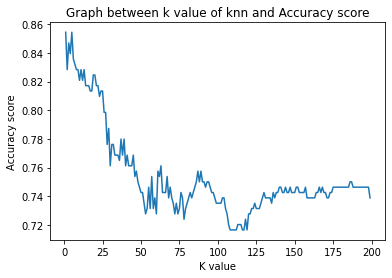

In [25]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)


# Conclusion

- When the K value is 1 , It gives highest accuracy : 0.8544 (but it overfits the data)
- When the K value is 5 , It gives same accuracy as that for k=1 : 0.8544
- After K=5 , the accuracy decreases

- Hence, K=5 is the best for this Model


______________